#### Load Libraries

In [72]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pylab import scatter, show, legend, xlabel, ylabel
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import KFold
import plotly.graph_objects as go


### Load Data

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

### Data Cleaning

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df["SeniorCitizen"] = df["SeniorCitizen"].apply(lambda x: "Yes" if x == 1 else "No")
df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")

df['TotalCharges'] = np.where(df['TotalCharges'] == ' ', 0, df['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].astype(float)

### Exploratory Data Analysis

You can leverage what done in one of the previous assignments, recreate it and expand it.

Remove data that's related to their demographics. Replace the churn data to 0 or 1 values instead of churn or not churn. 

In [5]:
data = df.copy()
data['Churn'] = data['Churn'].replace({'No': 0, 'Yes': 1})
data.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], axis=1, inplace=True)



### Feature Engineering and Analysis
Think about any possible feature that is predictive of the target.  
Measure how each feature is predictive of the target and select all those relevant for the model.

### Logistic Regressions

### Configure the model using an appropriate classification technique

#### Using the Numerical variables

In [20]:
# The numerical variables
numeric_vars = data[['tenure', 'TotalCharges', 'MonthlyCharges']]

In [21]:
# Standardize numerical variables
scaler = MinMaxScaler()
scaler = scaler.fit(numeric_vars)
scaled = scaler.fit_transform(numeric_vars)
scaled_df = pd.DataFrame(scaled, columns = numeric_vars.columns)
scaled_df

,tenure,TotalCharges,MonthlyCharges
0,0.013889,0.003437,0.115423
1,0.472222,0.217564,0.385075
2,0.027778,0.012453,0.354229
3,0.625000,0.211951,0.239303
4,0.027778,0.017462,0.521891
...,...,...,...
7038,0.333333,0.229194,0.662189
7039,1.000000,0.847792,0.845274
7040,0.152778,0.039892,0.112935
7041,0.055556,0.035303,0.558706


In [22]:
x = scaled
y = data["Churn"]

In [23]:
# Scikit learn implementation just to check
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

lr_model = LogisticRegression(random_state = 13, solver = "saga")
lr_model = lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print(y_pred)

scikit_score = lr_model.score(x_test, y_test)
print("Score Scikit learn: ", scikit_score)

[0 0 0 ... 1 1 0]
Score Scikit learn:  0.78708303761533


In [24]:
# Create confusion matrix
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_pred).ravel()

# Calculate evaluation metrics
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f11 = f1_score(y_test, y_pred)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn1, '\tFalse Positive: ', fp1)
print('False Negative: ', fn1, '\tTrue Positive: ', tp1)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy1)
print('Precision: ', precision1)
print('Recall/Sensitivity: ', recall1)
print('F1 Score/Specificity: ', f11)

# Calculate AUC
auc1 = roc_auc_score(y_test, y_pred)
print('AUC: ', auc1)

Confusion Matrix:
True Negative:  946 	False Positive:  102
False Negative:  198 	True Positive:  163

Evaluation Metrics: 
Accuracy:  0.78708303761533
Precision:  0.6150943396226415
Recall/Sensitivity:  0.4515235457063712
F1 Score/Specificity:  0.5207667731629393
AUC:  0.677097650715781


#### Using the mixed of numerical and non-numerical

In [25]:
mixed_variables = data.copy()
mixed_variables = pd.get_dummies(mixed_variables)
mixed_variables

,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,0,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,1,0,0,1,1,...,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


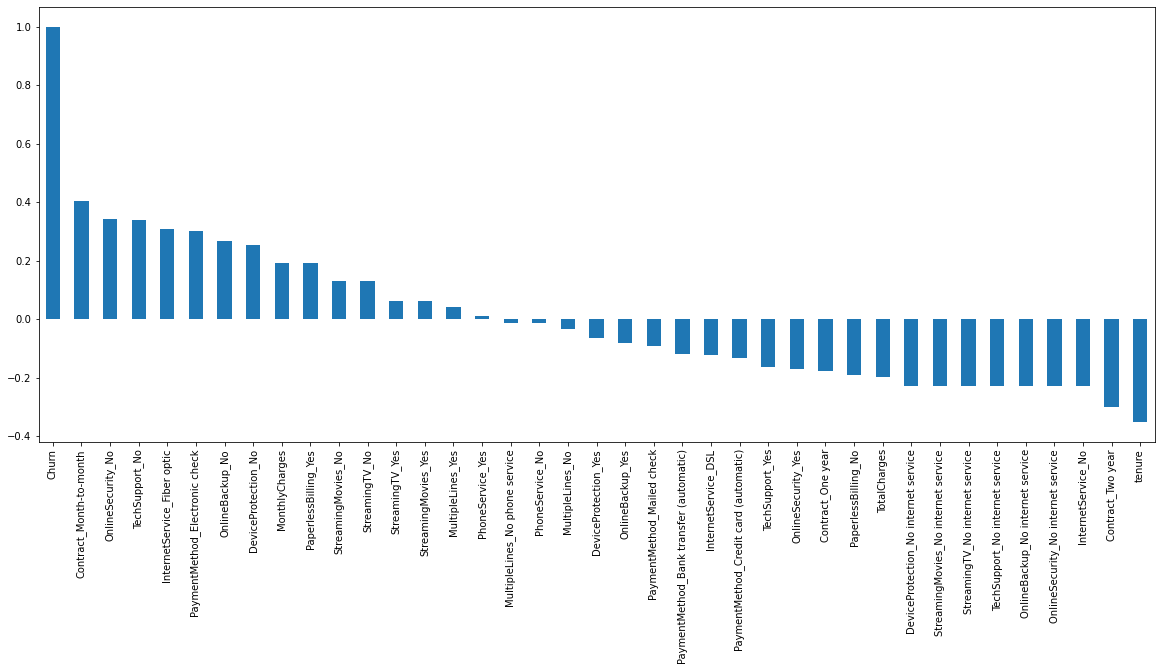

In [26]:
plt.figure(figsize=(20,8))
mixed_variables.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [27]:
chosen_1 = np.abs(mixed_variables.corr()['Churn']).sort_values(ascending=False)[np.abs(mixed_variables.corr()['Churn']).sort_values(ascending=False) >= 0.2].to_frame().index.values
chosen_1


array(['Churn', 'Contract_Month-to-month', 'tenure', 'OnlineSecurity_No',
       'TechSupport_No', 'InternetService_Fiber optic',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'OnlineBackup_No', 'DeviceProtection_No',
       'StreamingMovies_No internet service',
       'StreamingTV_No internet service',
       'TechSupport_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'OnlineSecurity_No internet service', 'InternetService_No'],
      dtype=object)

In [36]:
mixed_variables = mixed_variables[chosen_1]
mixed_variables = mixed_variables.drop(columns = ["Churn"])
mixed_variables

,Contract_Month-to-month,tenure,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No,StreamingMovies_No internet service,StreamingTV_No internet service,TechSupport_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,OnlineSecurity_No internet service,InternetService_No
0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0
1,0,34,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,45,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,2,1,1,1,0,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7039,0,72,1,1,1,0,0,0,0,0,0,0,0,0,0,0
7040,1,11,0,1,0,0,1,1,1,0,0,0,0,0,0,0
7041,1,4,1,1,1,0,0,1,1,0,0,0,0,0,0,0


In [68]:
def mse(actual_y, predicted_y):
    return np.mean((actual_y - predicted_y)**2)

In [37]:
def compute_CV_error(model, X_train, Y_train):
    kf = KFold(n_splits=5)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)

        # Compute the RMSE on the validation split
        error = mse(split_Y_valid, model.predict(split_X_valid))

        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [97]:
def findingBestNumFeatures(model, X_train, Y_train, X_test, Y_test):
    names = []
    trainErrors = []
    errors = []
    recalls = []
    accuracies = []
    range_of_num_features = range(1, X_train.shape[1] + 1)
    for N in range_of_num_features:
        names.append(f"First {N} features")
        # compute the train mse
        model.fit(X_train.iloc[:,0:N],Y_train)
        trainError = mse(Y_train, model.predict(X_train.iloc[:,0:N]))
        trainErrors.append(trainError)
        # compute the cross validation error
        error = compute_CV_error(model,X_train.iloc[:,0:N],Y_train)
        errors.append(error)
        # compute the recall
        Y_pred = model.predict(X_test.iloc[:,0:N])
        recall = recall_score(Y_test, Y_pred)
        recalls.append(recall)
        # compute the accuracy
        accuracy = accuracy_score(Y_test, Y_pred)
        accuracies.append(accuracy)

        
    fig = go.Figure([
        go.Bar(x= names, y=trainErrors, name="Training MSE"),
        go.Bar(x = names, y=errors, name="CV MSE"),
        go.Bar(x = names, y=recalls, name="Recalls"),
        go.Bar(x = names, y=accuracies, name="Accuracies")
    ])    

    best_num_features = np.argmin(errors) + 1
    best_err = min(errors)    
    the_features = X_train.iloc[:,0:best_num_features].columns.tolist()
    best_num_features_recall = np.argmax(recalls) + 1
    best_recall = max(recalls)
    the_features_recall = X_train.iloc[:,0:best_num_features_recall].columns.tolist()
    best_num_features_accuracy = np.argmax(accuracies) + 1
    best_accuracy = max(accuracies)
    the_features_accuracy = X_train.iloc[:,0:best_num_features_accuracy].columns.tolist()
    return [fig, best_num_features, best_err, errors, the_features, best_recall, best_num_features_recall, the_features_recall,
           best_num_features_accuracy, best_accuracy, the_features_accuracy]

In [79]:
# Standardize numerical variables
scaler_2 = MinMaxScaler()
scaler_2 = scaler_2.fit(mixed_variables)
scaled_2 = scaler_2.fit_transform(mixed_variables)
scaled_df_2 = pd.DataFrame(scaled_2, columns = mixed_variables.columns)
scaled_df_2

,Contract_Month-to-month,tenure,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No,StreamingMovies_No internet service,StreamingTV_No internet service,TechSupport_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,OnlineSecurity_No internet service,InternetService_No
0,1.0,0.013889,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.472222,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.027778,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.625000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.027778,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7039,0.0,1.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7040,1.0,0.152778,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7041,1.0,0.055556,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
x_2 = scaled_df_2
y = data["Churn"]

In [81]:
# Scikit learn implementation just to check
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y, test_size=0.2, random_state=0)
lr_model_2 = LogisticRegression(random_state = 0, solver = "saga")
lr_model_2 = lr_model_2.fit(x_train_2, y_train_2)
y_pred_2 = lr_model_2.predict(x_test_2)
scikit_score_2 = lr_model_2.score(x_test_2, y_test_2)
print("Score Scikit learn: ", scikit_score_2)

Score Scikit learn:  0.7977288857345636


In [98]:
findFeaturesComparison = findingBestNumFeatures(lr_model_2, x_train_2, y_train_2, x_test_2, y_test_2)

In [92]:
range_of_num_features = range(1, x_train_2.shape[1] + 1)
errors = findFeaturesComparison[3]
for N in range_of_num_features:
    print(f"Trying first {N} features")
    # compute the cross validation error
    error = errors[N-1]
    print("\tMSE:", error)

Trying first 1 features
	MSE: 0.2664147101423008
Trying first 2 features
	MSE: 0.23979237227364497
Trying first 3 features
	MSE: 0.21991328618867426
Trying first 4 features
	MSE: 0.21973440546192996
Trying first 5 features
	MSE: 0.2122786252503936
Trying first 6 features
	MSE: 0.2122784676462291
Trying first 7 features
	MSE: 0.20482300264302183
Trying first 8 features
	MSE: 0.20251504725760877
Trying first 9 features
	MSE: 0.20340283151641997
Trying first 10 features
	MSE: 0.2028702870444649
Trying first 11 features
	MSE: 0.2028702870444649
Trying first 12 features
	MSE: 0.2028702870444649
Trying first 13 features
	MSE: 0.2028702870444649
Trying first 14 features
	MSE: 0.2028702870444649
Trying first 15 features
	MSE: 0.2028702870444649
Trying first 16 features
	MSE: 0.2028702870444649


In [100]:
print(f"Best choice, use the first {findFeaturesComparison[1]} features, which has validation MSE: {findFeaturesComparison[2]}")
print(f"These features are: {findFeaturesComparison[4]}\n")
print(f"Best choice, use the first: {findFeaturesComparison[6]} which has recall of: {findFeaturesComparison[5]}")
print(f"These features are: {findFeaturesComparison[7]}\n")
print(f"Best choice, use the first: {findFeaturesComparison[8]} which has accuracy of: {findFeaturesComparison[9]}")
print(f"These features are: {findFeaturesComparison[10]}\n")

fig = findFeaturesComparison[0]
fig

Best choice, use the first 8 features, which has validation MSE: 0.20251504725760877
These features are: ['Contract_Month-to-month', 'tenure', 'OnlineSecurity_No', 'TechSupport_No', 'InternetService_Fiber optic', 'Contract_Two year', 'PaymentMethod_Electronic check', 'OnlineBackup_No']

Best choice, use the first: 3 which has recall of: 0.5271739130434783
These features are: ['Contract_Month-to-month', 'tenure', 'OnlineSecurity_No']

Best choice, use the first: 9 which has accuracy of: 0.7991483321504613
These features are: ['Contract_Month-to-month', 'tenure', 'OnlineSecurity_No', 'TechSupport_No', 'InternetService_Fiber optic', 'Contract_Two year', 'PaymentMethod_Electronic check', 'OnlineBackup_No', 'DeviceProtection_No']

